# Linear Regression


# Setup

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import random
from ipywidgets import interact, widgets

# %matplotlib notebook
# %matplotlib widget
# %matplotlib inline


MIN_VALUE = 0
MAX_VALUE = 1
NB_ELEMENTS = 100

x = np.linspace(MIN_VALUE, MAX_VALUE, NB_ELEMENTS)
COEF_A_MIN = 0
COEF_A_MAX = 5

COEF_B_MIN = 0
COEF_B_MAX = 5

COEF_DELTA_A = ((COEF_A_MAX) - (COEF_A_MIN)) * (1/3)
COEF_DELTA_B = ((COEF_B_MAX) - (COEF_B_MIN)) * (1/3)

COEF_A = (random.random() * (COEF_DELTA_A)) + COEF_A_MIN + COEF_DELTA_A
COEF_B = (random.random() * (COEF_DELTA_B)) + COEF_B_MIN + COEF_DELTA_B
random_noise = np.random.random(NB_ELEMENTS) * MAX_VALUE * 2
random_noise -= random_noise.mean()
# y = (a * x) + b
# plt.scatter(x, y)
y = (COEF_A * x) + COEF_B + random_noise


# Sample 10 random points uniformly between 0 and 1
X_TEST = np.random.uniform(MIN_VALUE, MAX_VALUE, 10)

print(f"{x.shape = }")
print(f"{y.shape = }")
print(f"{COEF_A = }")
print(f"{COEF_B = }")

x.shape = (100,)
y.shape = (100,)
COEF_A = 2.1011435989320937
COEF_B = 3.002054397562077


In [11]:
def predict(x, thetas):
    a, b = thetas
    y_hat = a * x + b
    return y_hat


def get_cost(y, y_hat):
    return ((y - y_hat) ** 2).sum()

In [12]:
costs = []
for a in np.linspace(COEF_A_MIN, COEF_A_MAX, 50):
    for b in np.linspace(COEF_B_MIN, COEF_B_MAX, 50):
        thetas = np.array((a, b))
        cost = get_cost(y, predict(x, thetas))
        costs.append((a, b, cost))

MIN_COST = min(costs, key=lambda x: x[2])[2]
MAX_COST = max(costs, key=lambda x: x[2])[2]
print(f"{MIN_COST = }")
print(f"{MAX_COST = }")

WORST_A_PARAM = max(costs, key=lambda x: x[2])[0]
WORST_B_PARAM = max(costs, key=lambda x: x[2])[1]

MIN_COST = 33.25517098760047
MAX_COST = 1724.7441013094885


In [13]:
def plot_1_the_data_story(x, y, test_x):
    plt.scatter(x, y, label="All the sold sculptures from previous auctions")
    plt.title("Auction price by weight")
    plt.xlabel("X : Weight (kg)")
    plt.ylabel("Y : Price (10k$)")

    # Plot vertical lines at each sample point
    for i, point in enumerate(test_x):
        if i == 0:
            plt.axvline(
                x=point,
                ymin=-0.05,
                ymax=0.05,
                color="orange",
                linestyle="-",
                label=f"Sculptures to be sold at the next auction",
            )
        else:
            plt.axvline(x=point, ymin=-0.05, ymax=0.05, color="orange", linestyle="-")

    plt.legend()


def plot_2_linear_regression(
    x, y, thetas, X_TEST, show_predictions=False
):
    fig, (ax1) = plt.subplots(
        1, 1, figsize=(12, 6)
    )

    # Linear regression plot
    ax1.scatter(x, y, c="b", label="Data")
    y_hat = predict(x, thetas)
    # error = get_cost(y, y_hat)
    ax1.plot(x, y_hat, c="r", label="Linear Regression")
    ax1.set_ylim(0, (COEF_A * COEF_DELTA_A) + COEF_B + 1)
    ax1.set_xlabel("X : Weight (kg)")
    ax1.set_ylabel("Y : Price (10k$)")
    ax1.set_title("Linear Regression")

    if show_predictions:
        y_hat_test = predict(X_TEST, thetas)

        for test_x_i, test_y_hat_i in zip(X_TEST, y_hat_test):
            ax1.plot(
                (test_x_i, test_x_i),
                (0, test_y_hat_i),
                color="gray",
                alpha=0.5,
                # linestyle=":",
            )
            ax1.plot(
                (0, test_x_i),
                (test_y_hat_i, test_y_hat_i),
                color="gray",
                alpha=0.5,
                # linestyle=":",
            )

    # Plot vertical lines at each sample point
    for i, point in enumerate(X_TEST):
        if i == 0:
            ax1.axvline(
                x=point,
                ymin=-0.05,
                ymax=0.05,
                color="orange",
                linestyle="-",
                label=f"Sculptures to be sold at the next auction",
            )
        else:
            ax1.axvline(x=point, ymin=-0.05, ymax=0.05, color="orange", linestyle="-")

    ax1.legend()


def plot_3_linear_regression_with_error(
    x, y, thetas, show_errors=False, min_error=0, max_error=10000, show_cost=False
):
    fig, (ax1, ax2) = plt.subplots(
        1, 2, figsize=(16, 6), gridspec_kw={"width_ratios": [3, 1]}
    )

    # Linear regression plot
    ax1.scatter(x, y, c="b", label="Data")
    y_hat = predict(x, thetas)
    error = get_cost(y, y_hat)
    ax1.plot(x, y_hat, c="r", label="Linear Regression")
    if show_errors:
        for x_element, y_element, y_hat_element in zip(x, y, y_hat):
            ax1.plot((x_element, x_element), (y_element, y_hat_element), ":y")
    ax1.set_ylim(0, (COEF_A * COEF_DELTA_A) + COEF_B + 1)
    ax1.set_xlabel("X")
    ax1.set_ylabel("Y")
    ax1.set_title("Linear Regression")

    if show_cost:
        # Vertical error bar plot
        ax2.bar(["Error"], [error], color="y")
        ax2.set_ylim(0, max_error)
        ax2.set_ylabel("Error Value")
        ax2.set_title("Error")

    # Plot vertical lines at each sample point
    for i, point in enumerate(X_TEST):
        if i == 0:
            ax1.axvline(
                x=point,
                ymin=-0.05,
                ymax=0.05,
                color="orange",
                linestyle="-",
                label=f"Sculptures to be sold at the next auction",
            )
        else:
            ax1.axvline(x=point, ymin=-0.05, ymax=0.05, color="orange", linestyle="-")

    ax1.legend()

    return error

## Side


<!-- ![Linear regression image](https://production-media.paperswithcode.com/methods/2560px-Linear_regression.svg_wwqz1f3.png) -->

![Linear Regression](./data/linear_regression.png)

![ML System](./data/ML_System.png)



https://github.com/42-AI/bootcamp_machine-learning

## Data

### X can have multiple features

$$
X^{(m)}_n
$$

### Y only has one dimension

$$
Y^{(m)}
$$


$m$ is the number of examples

$n$ is the number of dimensions / features

## Predict

A simple formula:
$$
\hat{y} = ax + b
$$

That we can genralize to multiple dimensions with Thetas:
$$
\hat{y} = θ_0 \cdot x + θ_1
$$

## Cost

For each prediction we will measure the difference between the prediction and the true value
$$
\text{Cost}^{(i)} = abs(\hat{y}^{(i)} - y^{(i)})
$$

And we will apply it to our complete dataset and keep the mean

$$
\text{Cost} = \frac{\sum_{i=0}^{m}{abs(\hat{y}^{(i)} - y^{(i)})}}{m}
$$

# Teach

An Auction house just called you : 

their auctioneer just left them, with only 24 hours before the biggest auction of the year !

You must help them !



	You have a dataset of the price by items of previous auctions in function of their weight.
	Can you help them estimate the price of the current items in the auction ?


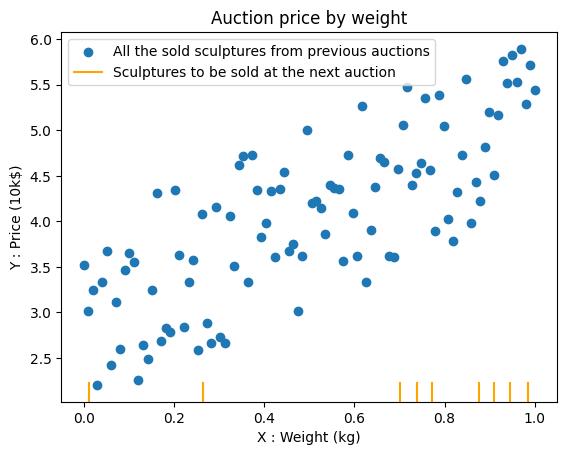

In [14]:
plot_1_the_data_story(x, y, X_TEST)

We could use a line to get en estimation !

In [15]:
global a, b
@interact(
    a=widgets.FloatSlider(
        min=COEF_A_MIN, max=COEF_A_MAX, value=WORST_A_PARAM,
    ),
    b=widgets.FloatSlider(
        min=COEF_B_MIN, max=COEF_B_MAX, value=WORST_B_PARAM,
    ),
    show_predictions=widgets.Checkbox(value=False, description="Show predictions"),
)
def interactive_linear_regression(a, b, show_predictions):
    thetas = np.array((a, b))
    plot_2_linear_regression(x, y, thetas, X_TEST, show_predictions=show_predictions)
    print(f"Linear regression:")
    print(f"")
    print(f"    thetas = {thetas}")
    print(f"    Sum(predicted prices) = {sum(predict(X_TEST, thetas)):.1f}k $")

interactive(children=(FloatSlider(value=0.0, description='a', max=5.0), FloatSlider(value=0.0, description='b'…

# Predict

$$
\hat{y} = ax + b
$$

But, how can we know if our line is the best possible ?

It could impact hundreds of dollars of variations !

In [19]:
@interact(
    a=widgets.FloatSlider(
        min=COEF_A_MIN, max=COEF_A_MAX, value=0,
    ),
    b=widgets.FloatSlider(
        min=COEF_B_MIN, max=COEF_B_MAX, value=0,
    ),
    show_errors=widgets.Checkbox(value=False, description="Show errors"),
)
def interactive_linear_regression(a, b, show_errors):
    thetas = np.array((a, b))
    error = plot_3_linear_regression_with_error(
        x,
        y,
        thetas,
        show_errors=show_errors,
        min_error=MIN_COST,
        max_error=MAX_COST,
        show_cost=show_errors,
    )
    print(f"Linear regression:")
    print(f"")
    print(f"    thetas = {thetas}")
    print(f"    error = {error}")
    print(f"    Sum(predicted prices) = {sum(predict(X_TEST, thetas)):.1f}k $")

interactive(children=(FloatSlider(value=0.0, description='a', max=5.0), FloatSlider(value=0.0, description='b'…

# Cost

For each prediction we will measure the difference between the prediction and the true value
$$
\text{Cost} = \sum_{i=0}^{m}{(\hat{y}^{(i)} - y^{(i)})^2}
$$

In [17]:
import pickle

with open("Teach_linear_regression.pkl", "wb") as f:
    pickle.dump((
        x, y, COEF_A, COEF_B,
        COEF_A_MIN, COEF_A_MAX,
        COEF_B_MIN, COEF_B_MAX,
        WORST_A_PARAM, WORST_B_PARAM,
        MIN_COST, MAX_COST,
        MIN_VALUE, MAX_VALUE, NB_ELEMENTS,
    ), f)
